In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
df = pd.read_excel("teste_cluster.xlsx")

In [21]:
df.head()

,A,B1,C1
0,20.168317,A,B
1,20.965417,A,B
2,22.562924,A,B
3,25.357693,A,B
4,22.856500,A,B


In [22]:
df.loc[:,'A'] = pd.qcut(df.A, 5)

In [23]:
df.head()

,A,B1,C1
0,"(20.017, 25.112]",A,B
1,"(20.017, 25.112]",A,B
2,"(20.017, 25.112]",A,B
3,"(25.112, 30.453]",A,B
4,"(20.017, 25.112]",A,B


In [9]:
#!pip install category_encoders

In [24]:
df_clus = df.astype(object)

from category_encoders import OneHotEncoder

enc = OneHotEncoder(use_cat_names=True)

df_clus_dummy = enc.fit_transform(df_clus)
df_clus_dummy

,"A_(20.017, 25.112]","A_(25.112, 30.453]","A_(35.49, 40.897]","A_(30.453, 35.49]","A_(40.897, 45.973]",B1_A,B1_B,B1_C,C1_B,C1_C
0,1,0,0,0,0,1,0,0,1,0
1,1,0,0,0,0,1,0,0,1,0
2,1,0,0,0,0,1,0,0,1,0
3,0,1,0,0,0,1,0,0,1,0
4,1,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,1,0,0,1,0,1
996,0,0,0,0,1,0,0,1,0,1
997,0,0,0,0,1,0,0,1,0,1
998,0,0,0,0,1,0,0,1,0,1


In [25]:
df_clus_dummy_cos = df_clus_dummy/2
df_clus_dummy_cos

,"A_(20.017, 25.112]","A_(25.112, 30.453]","A_(35.49, 40.897]","A_(30.453, 35.49]","A_(40.897, 45.973]",B1_A,B1_B,B1_C,C1_B,C1_C
0,0.5,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.5,0.0
1,0.5,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.5,0.0
2,0.5,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.5,0.0
3,0.0,0.5,0.0,0.0,0.0,0.5,0.0,0.0,0.5,0.0
4,0.5,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.5,0.0
...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.5,0.0,0.5
996,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.5,0.0,0.5
997,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.5,0.0,0.5
998,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.5,0.0,0.5


C:\Users\gcabr\AppData\Local\Temp\ipykernel_23028\621191189.py:8: ConvergenceWarning: Number of distinct clusters (10) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  km.fit(df_clus_dummy_cos)


C:\Users\gcabr\AppData\Local\Temp\ipykernel_23028\621191189.py:8: ConvergenceWarning: Number of distinct clusters (10) found smaller than n_clusters (12). Possibly due to duplicate points in X.
  km.fit(df_clus_dummy_cos)


C:\Users\gcabr\AppData\Local\Temp\ipykernel_23028\621191189.py:8: ConvergenceWarning: Number of distinct clusters (10) found smaller than n_clusters (13). Possibly due to duplicate points in X.
  km.fit(df_clus_dummy_cos)


C:\Users\gcabr\AppData\Local\Temp\ipykernel_23028\621191189.py:8: ConvergenceWarning: Number of distinct clusters (10) found smaller than n_clusters (14). Possibly due to duplicate points in X.
  km.fit(df_clus_dummy_cos)


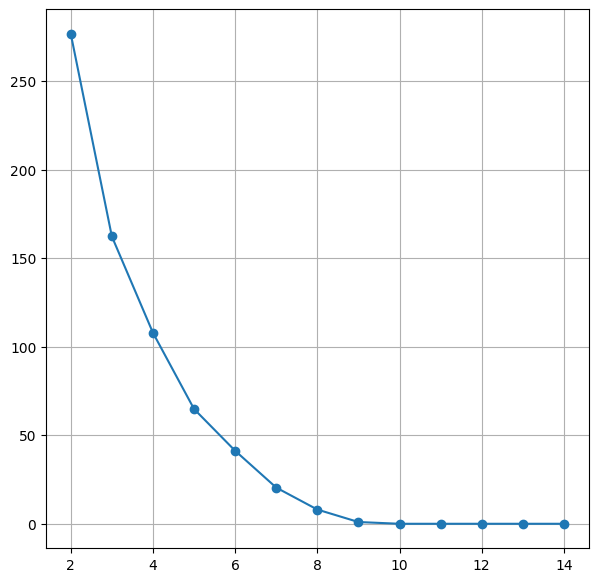

In [26]:
from sklearn.cluster import KMeans

n_clusts = range(2,15)
inercias = []
for n_clust in n_clusts:
    print(n_clust, end='\r')
    km = KMeans(n_clusters=n_clust, n_init=100, max_iter=3_000, random_state=61658)
    km.fit(df_clus_dummy_cos)
    inercias.append(km.inertia_)
    
plt.figure(figsize=(7,7))
plt.plot(n_clusts,inercias, 'o-')
plt.grid()

In [27]:
km5 = KMeans(n_clusters=6, n_init=100, max_iter=3_000, random_state=61658)
df_clust_5 = df.copy()
df_clust_5.loc[:,'cluster'] = km5.fit_predict(df_clus_dummy_cos)

In [28]:
df_clust_5

,A,B1,C1,cluster
0,"(20.017, 25.112]",A,B,2
1,"(20.017, 25.112]",A,B,2
2,"(20.017, 25.112]",A,B,2
3,"(25.112, 30.453]",A,B,0
4,"(20.017, 25.112]",A,B,2
...,...,...,...,...
995,"(40.897, 45.973]",C,C,4
996,"(40.897, 45.973]",C,C,4
997,"(40.897, 45.973]",C,C,4
998,"(40.897, 45.973]",C,C,4


In [29]:
df_clust_5.to_excel("cluster_teste.xlsx")